In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_gp
import ariel_load
import ariel_load_FGS
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
import importlib
from tqdm import tqdm
kgs.debugging_mode = 1
kgs.profiling=False
kgs.n_workers = 3

local


In [2]:
train_data = kgs.load_all_train_data()
train_data = train_data

In [3]:
# importlib.reload(kgs)
# for d in train_data:
#     d.spectrum_cov = np.ones((283,283))
# kgs.mats_to_data(train_data, train_data, kgs.data_to_mats(train_data,train_data))
# kgs.score_metric(train_data, train_data)

In [4]:
importlib.reload(ariel_model)
todo = dict()

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
#todo['New baseline'] = model

model = ariel_model.Fudger2(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
todo['New baseline fudger2'] = model

model = ariel_model.Fudger2(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
todo['New baseline fudger2 redo'] = model

model = ariel_model.Fudger2(model=ariel_gp.PredictionModel())
model.model.model_options.FGS_AIRS_decoupling = 1
model.model.run_in_parallel = True
todo['New baseline fudger2 coupling'] = model

In [5]:

kgs.sanity_checks_active = True
def fname(k):
    return kgs.temp_dir + 'evaluate_model_'+k+'__'+str(len(train_data))+'.pickle'
for k,v in todo.items():
    if not os.path.isfile(fname(k)):
        print(k)
        model = copy.deepcopy(v)
        
        #print('!!! also loader')
        #model_ref = kgs.dill_load(fname('New baseline'))[1]
        #model._cached_planet_id = model_ref._cached_planet_id
        #model._cached_result = model_ref._cached_result
        # model.bias_a = model_ref.bias_a
        # model.bias_b = model_ref.bias_b
        # model.sigma_fudge_FGS = model_ref.sigma_fudge[0]
        # model.sigma_fudge_AIRS_mean = model_ref.sigma_fudge[1]
        # model.sigma_fudge_AIRS_var = model_ref.sigma_fudge[1]
        
        # Precache data
        for d in tqdm(train_data):
            copy.deepcopy(d).load_to_step(5,model.model.starter_model.loaders)
        
        
        
        #model.state=1
        model.train(train_data)
        #kgs.list_attrs(model)
        inferred_data = model.infer(train_data)
        print(k)
        print(kgs.score_metric(inferred_data, train_data))
        #print('not saving')
        #kgs.list_attrs(model)
        kgs.dill_save(fname(k), (inferred_data,model,kgs.git_commit_id))
    else:
        print(k)
        (inferred_data,model,_) = kgs.dill_load(fname(k))
        #print(model.model.model_options.FGS_order)
        print(kgs.score_metric(inferred_data, train_data))

New baseline fudger2
Score:           0.6031
RMS error FGS:   209.82061 ppm
mRMS error FGS:  63.28264 ppm
RMS error AIRS:  154.89791 ppm
mRMS error AIRS: 59.71829 ppm
RMS error AIRSv: 69.54125 ppm
mRMS error AIRSv:37.11345 ppm
(0.6030974213843362, 0.0002098206109260716, 0.00015489790788519574)
New baseline fudger2 redo


Processing in parallel: 100%|█████████████████████████████████████████████████████| 1099/1099 [1:07:26<00:00,  3.68s/it]


local
SpawnPoolWorker-2 2
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-1 1
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-3 3
CUDA_VISIBLE_DEVICES= 0
Opt time 4079.307963848114
New baseline fudger2 redo
Score:           0.6031
RMS error FGS:   209.82061 ppm
mRMS error FGS:  63.28264 ppm
RMS error AIRS:  154.89791 ppm
mRMS error AIRS: 59.71829 ppm
RMS error AIRSv: 69.54125 ppm
mRMS error AIRSv:37.11345 ppm
(0.6030974213843362, 0.0002098206109260716, 0.00015489790788519574)
New baseline fudger2 coupling


Processing in parallel: 100%|█████████████████████████████████████████████████████| 1099/1099 [1:07:58<00:00,  3.71s/it]


local
SpawnPoolWorker-6 6
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-4 4
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-5 5
CUDA_VISIBLE_DEVICES= 0
Opt time 4107.286482334137
New baseline fudger2 coupling
Score:           0.6058
RMS error FGS:   200.96185 ppm
mRMS error FGS:  56.71279 ppm
RMS error AIRS:  156.85989 ppm
mRMS error AIRS: 61.40451 ppm
RMS error AIRSv: 70.29739 ppm
mRMS error AIRSv:38.78276 ppm
(0.6057860321513623, 0.0002009618543273438, 0.00015685988748103853)


New baseline fudger2
[1.0003066973224, 0.9979404822678982]
[-1.0711827752225214e-06, 7.3529863331580276e-06]
[8.740878554806385e-06, 1.1599754532137132e-05]
2.2322924005487494 2.200567504649376 1.3571834612322204
Score:           0.6031
RMS error FGS:   209.82061 ppm
mRMS error FGS:  63.28264 ppm
RMS error AIRS:  154.89791 ppm
mRMS error AIRS: 59.71829 ppm
RMS error AIRSv: 69.54125 ppm
mRMS error AIRSv:37.11345 ppm

20
Score:           0.6349
RMS error FGS:   84.93621 ppm
mRMS error FGS:  49.74196 ppm
RMS error AIRS:  66.32204 ppm
mRMS error AIRS: 57.91943 ppm
RMS error AIRSv: 47.84718 ppm
mRMS error AIRSv:45.66331 ppm

Score:           0.6031
RMS error FGS:   209.82061 ppm
mRMS error FGS:  63.28264 ppm
RMS error AIRS:  154.89791 ppm
mRMS error AIRS: 59.71829 ppm
RMS error AIRSv: 69.54125 ppm
mRMS error AIRSv:37.11345 ppm
FGS
1124834224, ratio:0.202, x:4.410e-03, y:8.901e-04, RMS:2.189e-04
1843015807, ratio:0.174, x:1.570e-02, y:2.729e-03, RMS:2.127e-03
AIRS
1843015807, ratio:0.133, x:

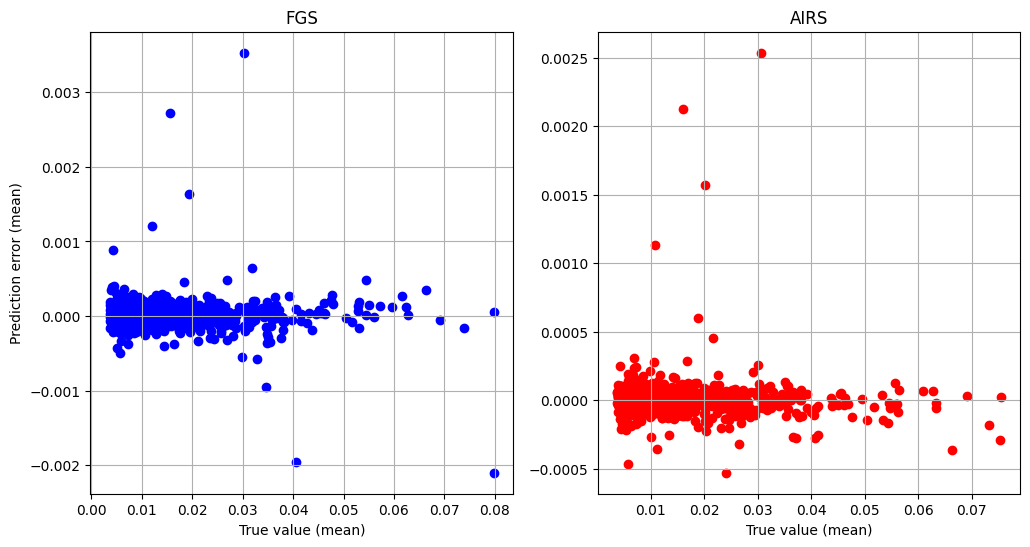

FGS
1349926825, ratio:11.382, x:1.847e-04, y:-2.102e-03, RMS:1.057e-03
3786449677, ratio:11.222, x:1.748e-04, y:-1.962e-03, RMS:4.928e-04
AIRS
2554492145, ratio:9.340, x:1.217e-04, y:1.137e-03, RMS:1.148e-03
94572221, ratio:9.221, x:5.066e-05, y:-4.672e-04, RMS:4.674e-04


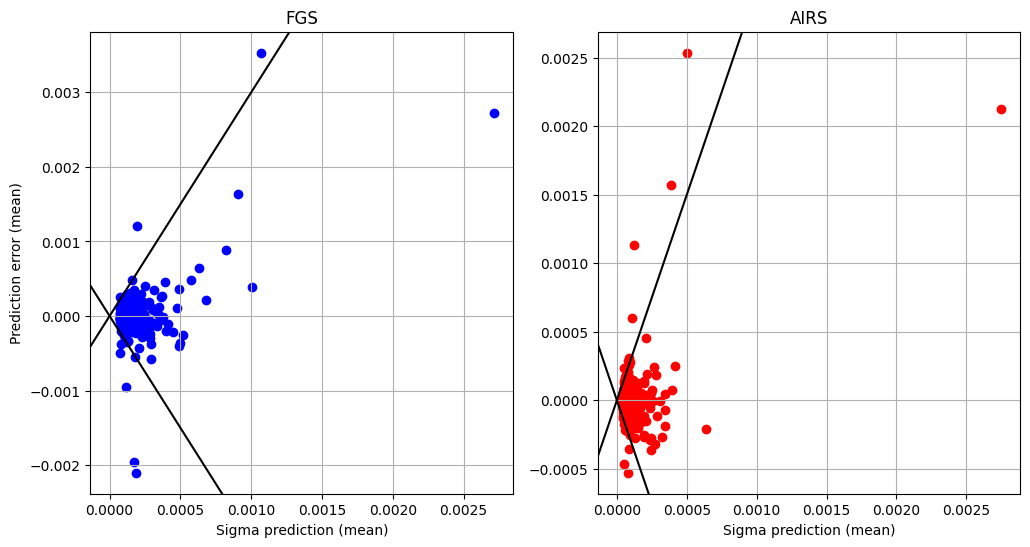

FGS
94572221, ratio:1180.298, x:5.648e-03, y:-6.667e+00, RMS:4.674e-04
2498341557, ratio:620.748, x:7.258e-03, y:-4.506e+00, RMS:1.049e-04
AIRS
94572221, ratio:1627.464, x:5.666e-03, y:-9.221e+00, RMS:4.674e-04
2554492145, ratio:860.149, x:1.086e-02, y:9.340e+00, RMS:1.148e-03


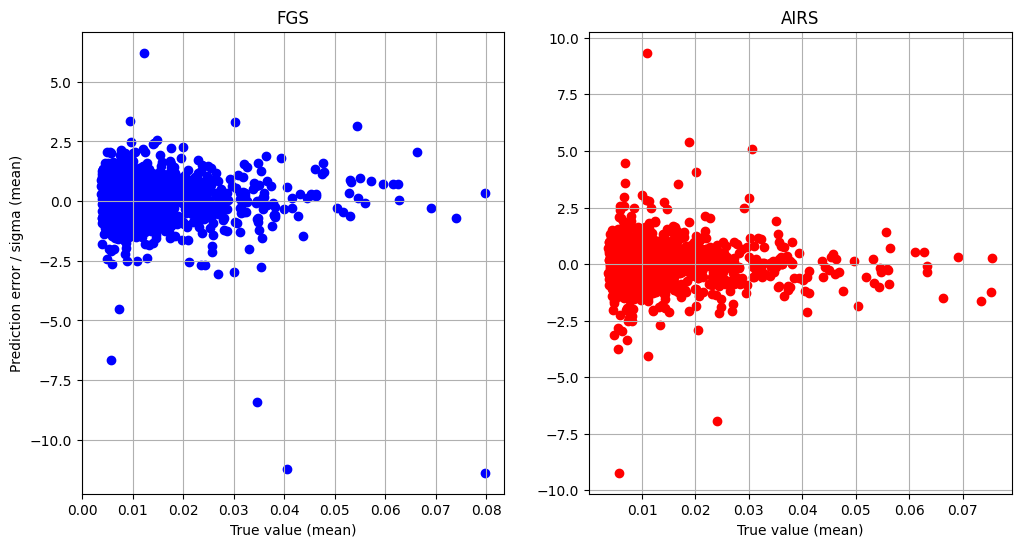

FGS
3669562759, ratio:16526051.752, x:4.804e-08, y:7.939e-01, RMS:2.009e-05
1712309297, ratio:2468198.070, x:2.156e-07, y:5.323e-01, RMS:1.486e-05
AIRS
4084207590, ratio:13295003.088, x:2.447e-08, y:3.253e-01, RMS:2.548e-05
3669562759, ratio:7267913.060, x:4.804e-08, y:3.491e-01, RMS:2.009e-05


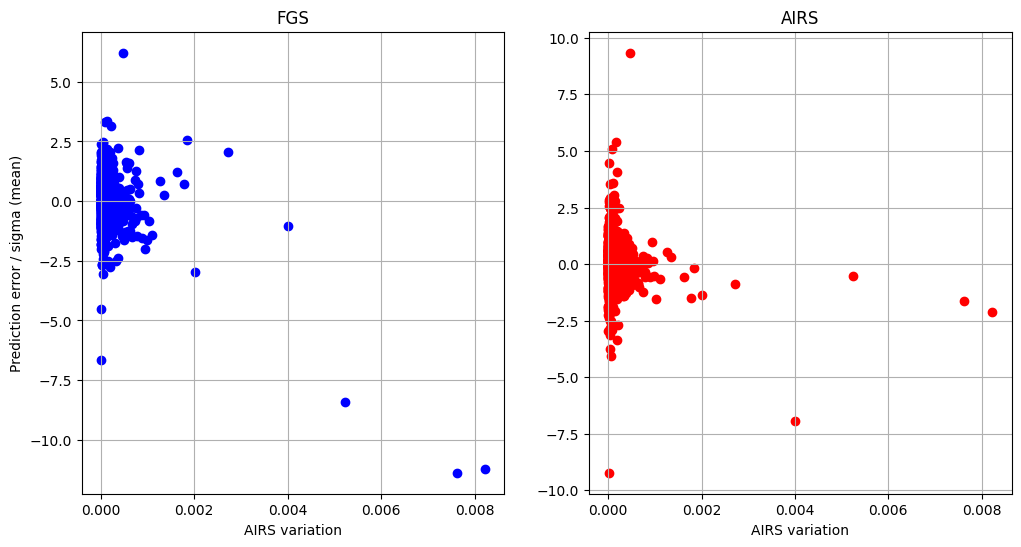

AIRS variation
1349926825, ratio:8.321, x:1.245e-04, y:1.036e-03, RMS:1.057e-03
2270815333, ratio:8.064, x:1.159e-04, y:9.346e-04, RMS:1.072e-03


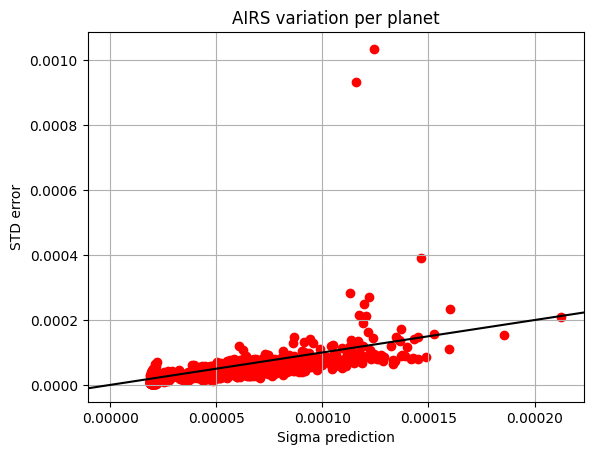

FGS
1287185057, ratio:463.288, x:4.095e-03, y:1.897e+00, RMS:3.827e-05
2270815333, ratio:460.907, x:1.750e-02, y:8.064e+00, RMS:1.072e-03
AIRS
926530491, ratio:465.413, x:6.964e-03, y:3.241e+00, RMS:1.042e-04
1287185057, ratio:450.532, x:4.211e-03, y:1.897e+00, RMS:3.827e-05


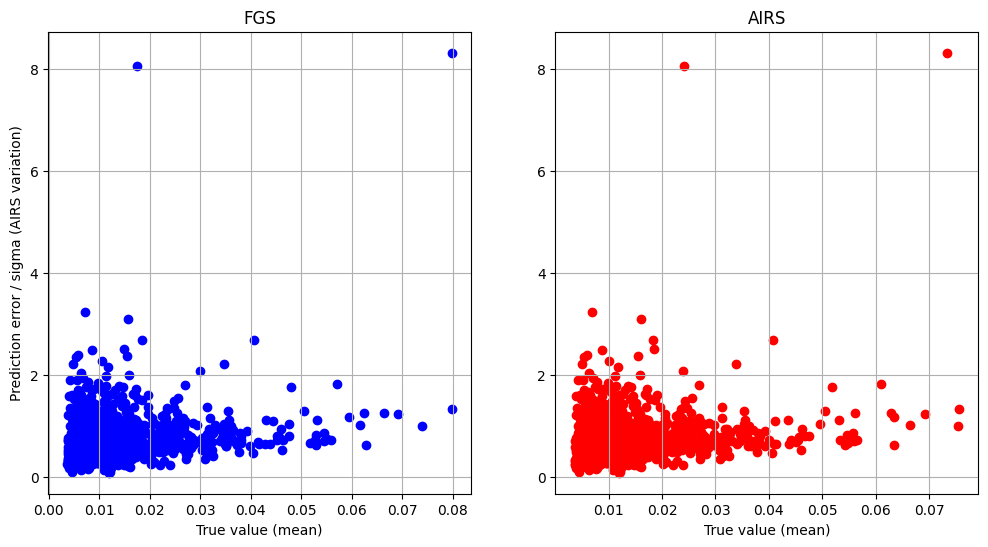

FGS
4084207590, ratio:12336846.763, x:2.447e-08, y:3.019e-01, RMS:2.548e-05
3669562759, ratio:5168864.642, x:4.804e-08, y:2.483e-01, RMS:2.009e-05
AIRS
4084207590, ratio:12336846.763, x:2.447e-08, y:3.019e-01, RMS:2.548e-05
3669562759, ratio:5168864.642, x:4.804e-08, y:2.483e-01, RMS:2.009e-05


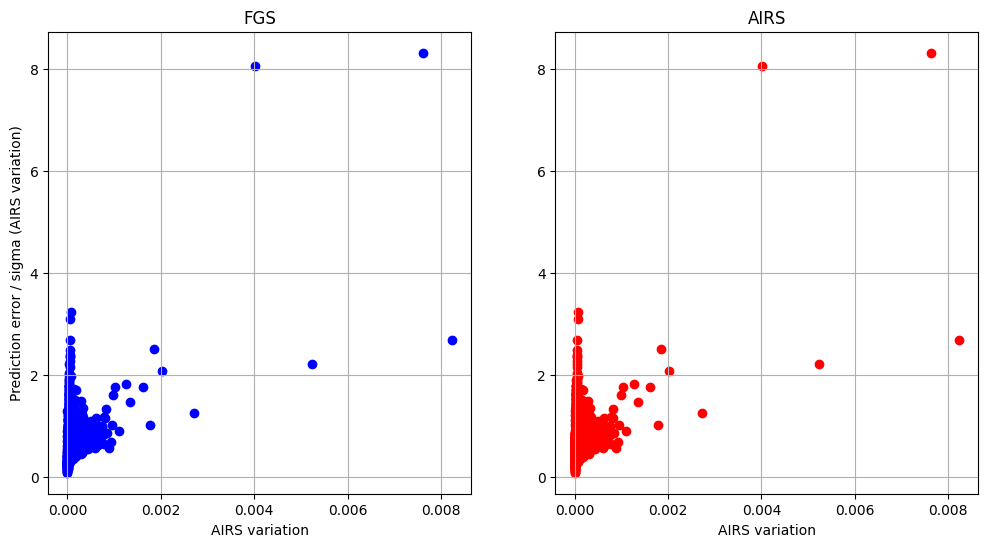

New baseline fudger2 redo
[1.0003066973224, 0.9979404822678982]
[-1.0711827752225214e-06, 7.3529863331580276e-06]
[8.740878554806385e-06, 1.1599754532137132e-05]
2.2322924005487494 2.200567504649376 1.3571834612322204
Score:           0.6031
RMS error FGS:   209.82061 ppm
mRMS error FGS:  63.28264 ppm
RMS error AIRS:  154.89791 ppm
mRMS error AIRS: 59.71829 ppm
RMS error AIRSv: 69.54125 ppm
mRMS error AIRSv:37.11345 ppm

20
Score:           0.6349
RMS error FGS:   84.93621 ppm
mRMS error FGS:  49.74196 ppm
RMS error AIRS:  66.32204 ppm
mRMS error AIRS: 57.91943 ppm
RMS error AIRSv: 47.84718 ppm
mRMS error AIRSv:45.66331 ppm

Score:           0.6031
RMS error FGS:   209.82061 ppm
mRMS error FGS:  63.28264 ppm
RMS error AIRS:  154.89791 ppm
mRMS error AIRS: 59.71829 ppm
RMS error AIRSv: 69.54125 ppm
mRMS error AIRSv:37.11345 ppm
FGS
1124834224, ratio:0.202, x:4.410e-03, y:8.901e-04, RMS:2.189e-04
1843015807, ratio:0.174, x:1.570e-02, y:2.729e-03, RMS:2.127e-03
AIRS
1843015807, ratio:0.13

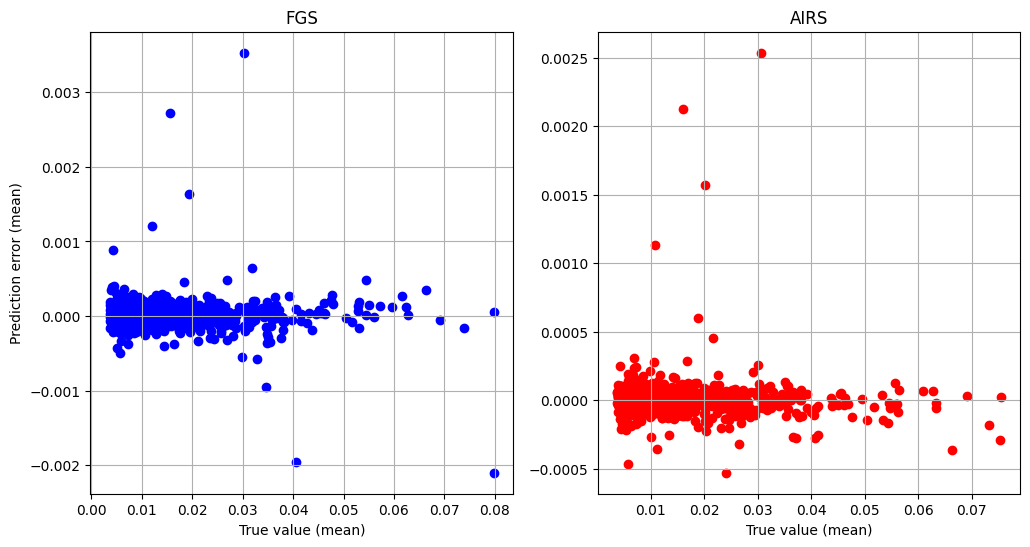

FGS
1349926825, ratio:11.382, x:1.847e-04, y:-2.102e-03, RMS:1.057e-03
3786449677, ratio:11.222, x:1.748e-04, y:-1.962e-03, RMS:4.928e-04
AIRS
2554492145, ratio:9.340, x:1.217e-04, y:1.137e-03, RMS:1.148e-03
94572221, ratio:9.221, x:5.066e-05, y:-4.672e-04, RMS:4.674e-04


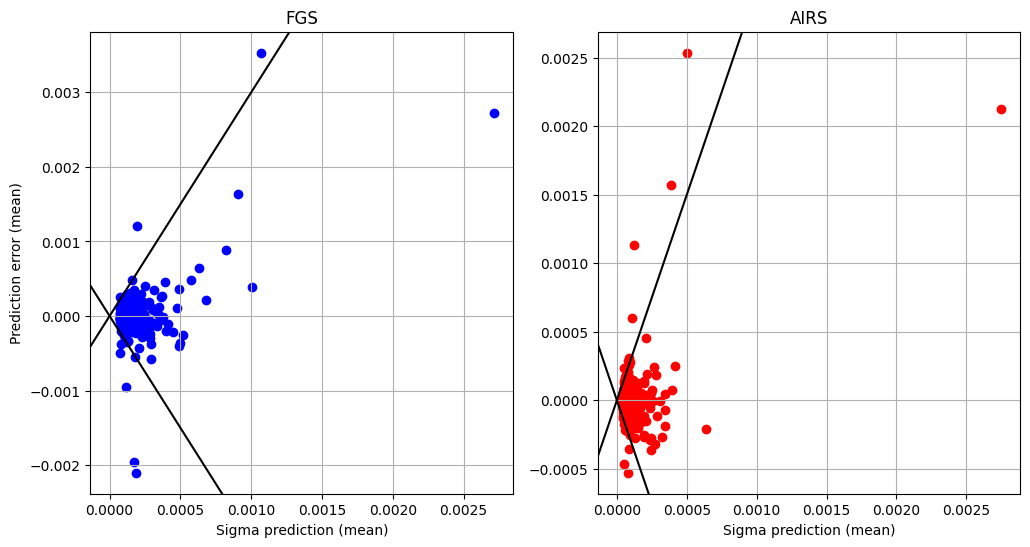

FGS
94572221, ratio:1180.298, x:5.648e-03, y:-6.667e+00, RMS:4.674e-04
2498341557, ratio:620.748, x:7.258e-03, y:-4.506e+00, RMS:1.049e-04
AIRS
94572221, ratio:1627.464, x:5.666e-03, y:-9.221e+00, RMS:4.674e-04
2554492145, ratio:860.149, x:1.086e-02, y:9.340e+00, RMS:1.148e-03


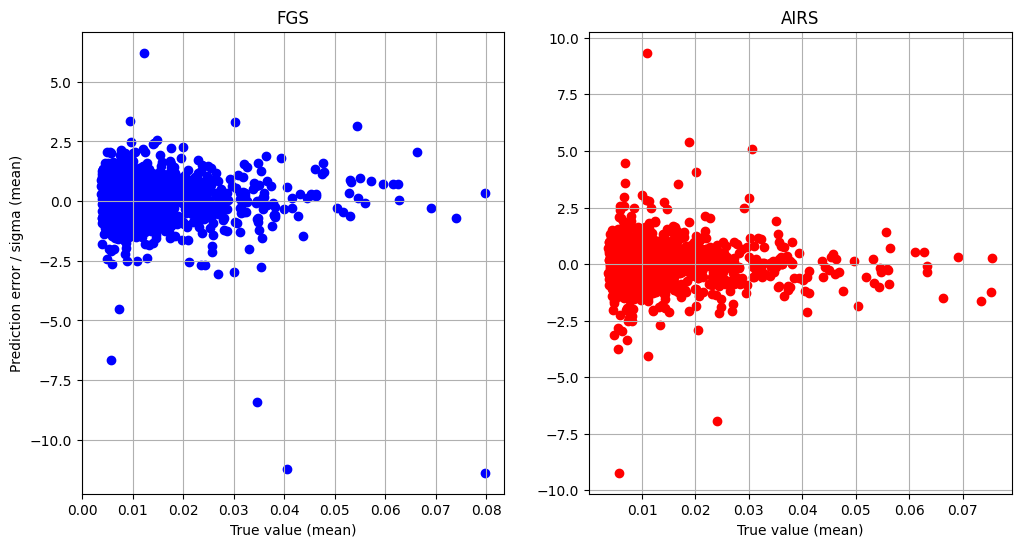

FGS
3669562759, ratio:16526051.752, x:4.804e-08, y:7.939e-01, RMS:2.009e-05
1712309297, ratio:2468198.070, x:2.156e-07, y:5.323e-01, RMS:1.486e-05
AIRS
4084207590, ratio:13295003.088, x:2.447e-08, y:3.253e-01, RMS:2.548e-05
3669562759, ratio:7267913.060, x:4.804e-08, y:3.491e-01, RMS:2.009e-05


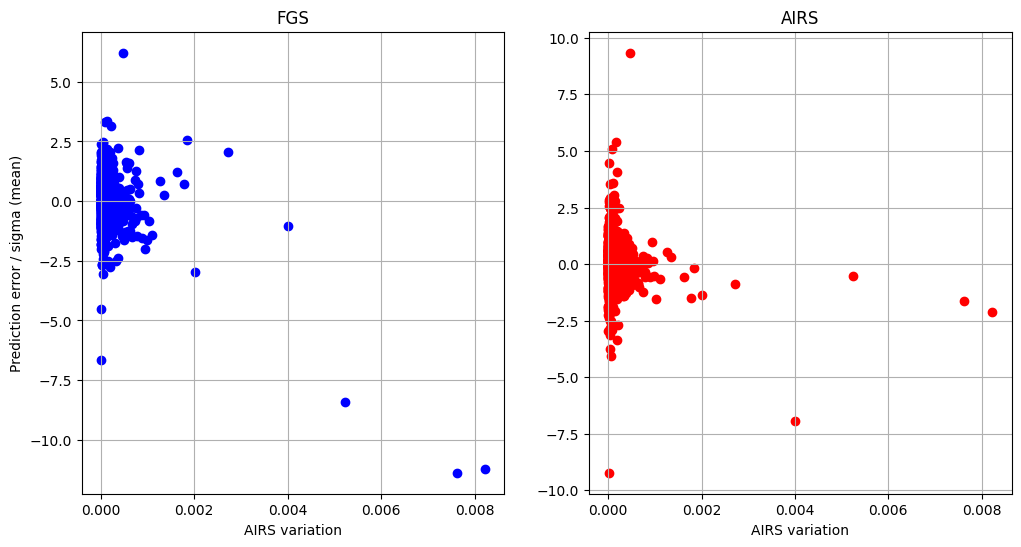

AIRS variation
1349926825, ratio:8.321, x:1.245e-04, y:1.036e-03, RMS:1.057e-03
2270815333, ratio:8.064, x:1.159e-04, y:9.346e-04, RMS:1.072e-03


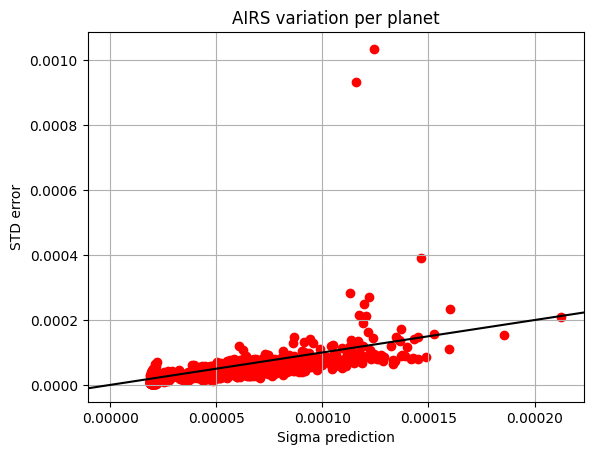

FGS
1287185057, ratio:463.288, x:4.095e-03, y:1.897e+00, RMS:3.827e-05
2270815333, ratio:460.907, x:1.750e-02, y:8.064e+00, RMS:1.072e-03
AIRS
926530491, ratio:465.413, x:6.964e-03, y:3.241e+00, RMS:1.042e-04
1287185057, ratio:450.532, x:4.211e-03, y:1.897e+00, RMS:3.827e-05


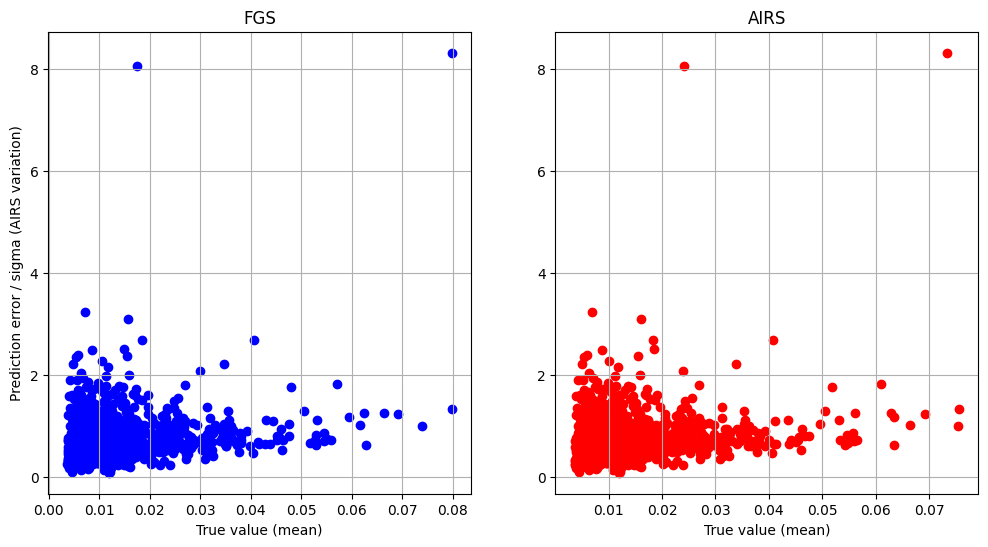

FGS
4084207590, ratio:12336846.763, x:2.447e-08, y:3.019e-01, RMS:2.548e-05
3669562759, ratio:5168864.642, x:4.804e-08, y:2.483e-01, RMS:2.009e-05
AIRS
4084207590, ratio:12336846.763, x:2.447e-08, y:3.019e-01, RMS:2.548e-05
3669562759, ratio:5168864.642, x:4.804e-08, y:2.483e-01, RMS:2.009e-05


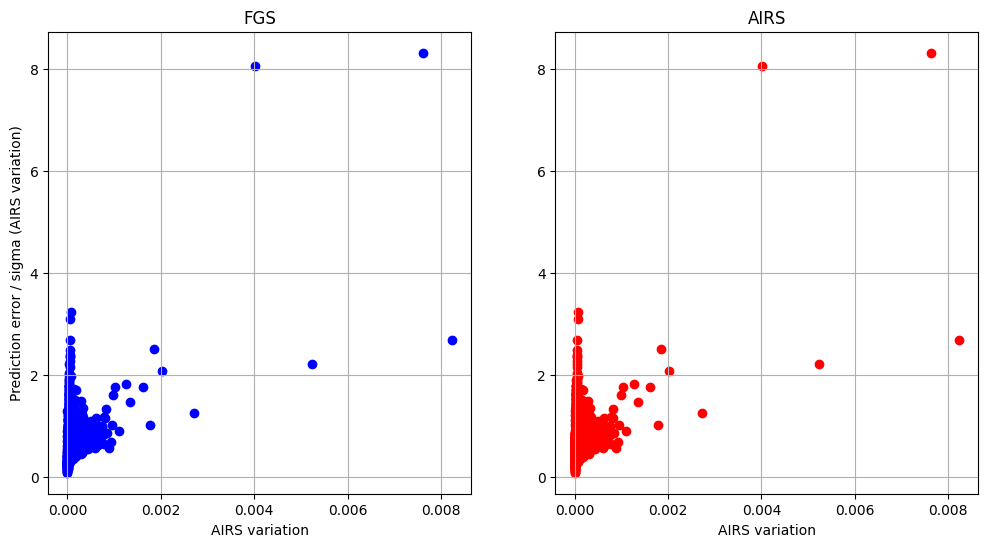

New baseline fudger2 coupling
[1.0000354727009932, 0.997926989294767]
[-6.878449743638786e-06, 8.980698884246084e-06]
[-3.000304374708812e-09, -9.286920628053679e-06]
2.411722509616992 2.115051468824912 1.3555273691140535
Score:           0.6058
RMS error FGS:   200.96185 ppm
mRMS error FGS:  56.71279 ppm
RMS error AIRS:  156.85989 ppm
mRMS error AIRS: 61.40451 ppm
RMS error AIRSv: 70.29739 ppm
mRMS error AIRSv:38.78276 ppm

20
Score:           0.6386
RMS error FGS:   68.09812 ppm
mRMS error FGS:  37.75732 ppm
RMS error AIRS:  65.52642 ppm
mRMS error AIRS: 60.80625 ppm
RMS error AIRSv: 48.40610 ppm
mRMS error AIRSv:46.08838 ppm

Score:           0.6058
RMS error FGS:   200.96185 ppm
mRMS error FGS:  56.71279 ppm
RMS error AIRS:  156.85989 ppm
mRMS error AIRS: 61.40451 ppm
RMS error AIRSv: 70.29739 ppm
mRMS error AIRSv:38.78276 ppm
FGS
1843015807, ratio:0.166, x:1.570e-02, y:2.606e-03, RMS:2.278e-03
3649218579, ratio:0.102, x:3.026e-02, y:3.080e-03, RMS:2.614e-03
AIRS
1843015807, ratio:

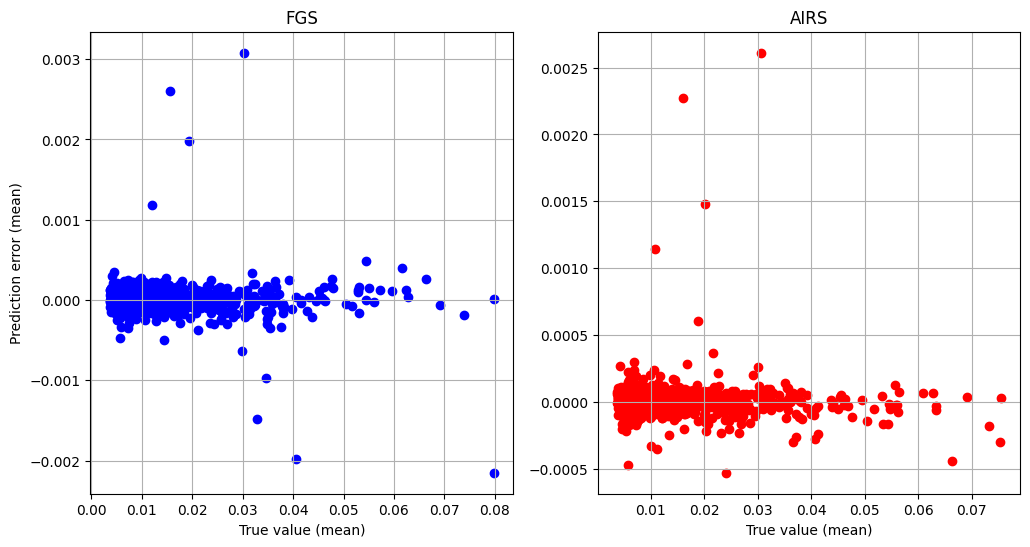

FGS
1349926825, ratio:10.876, x:1.977e-04, y:-2.150e-03, RMS:1.058e-03
3786449677, ratio:10.527, x:1.876e-04, y:-1.975e-03, RMS:4.932e-04
AIRS
94572221, ratio:10.461, x:4.511e-05, y:-4.719e-04, RMS:4.721e-04
2554492145, ratio:9.863, x:1.160e-04, y:1.144e-03, RMS:1.155e-03


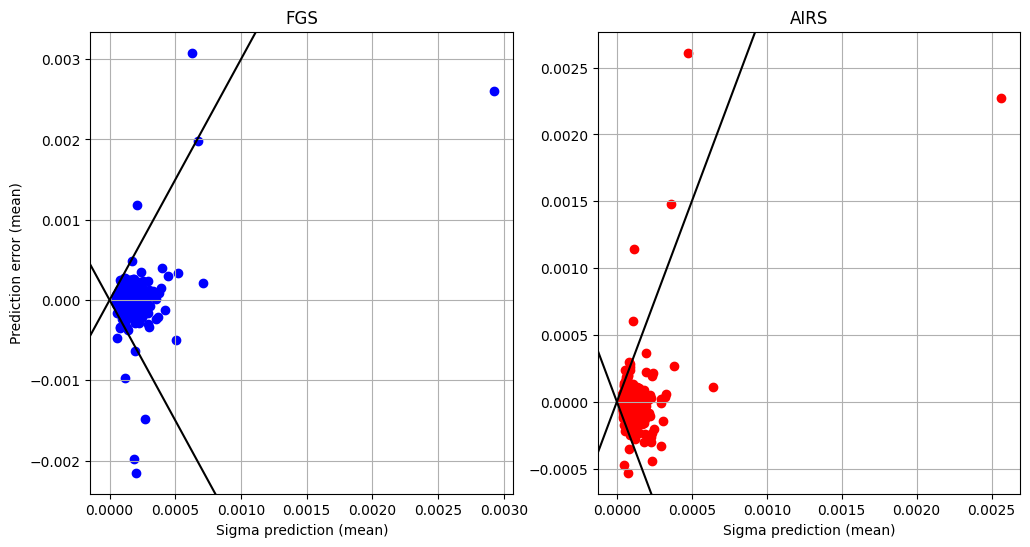

FGS
94572221, ratio:1490.964, x:5.648e-03, y:-8.421e+00, RMS:4.721e-04
695702599, ratio:737.583, x:5.846e-03, y:-4.312e+00, RMS:8.209e-05
AIRS
94572221, ratio:1846.200, x:5.666e-03, y:-1.046e+01, RMS:4.721e-04
2554492145, ratio:908.287, x:1.086e-02, y:9.863e+00, RMS:1.155e-03


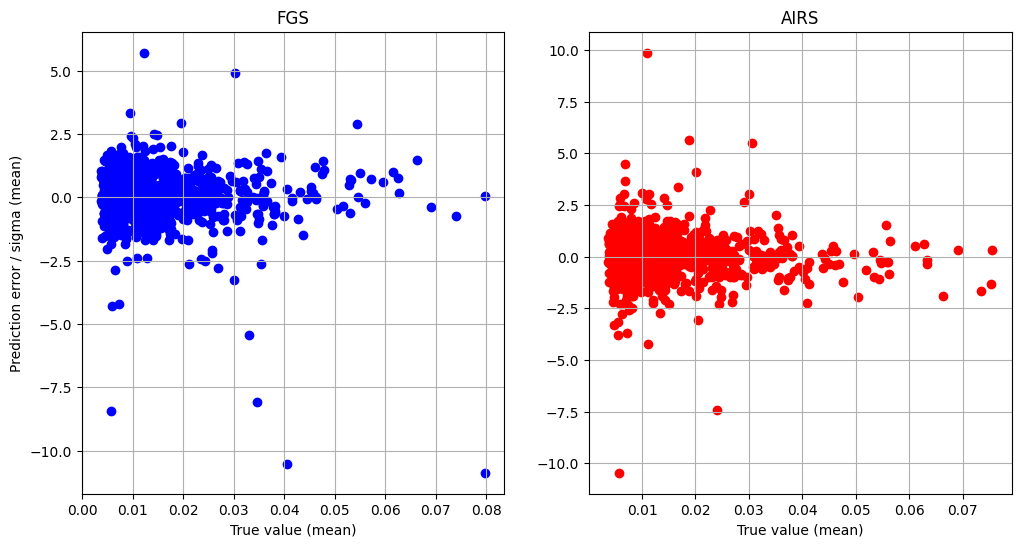

FGS
3669562759, ratio:10628406.868, x:4.804e-08, y:5.106e-01, RMS:2.230e-05
4084207590, ratio:9115669.322, x:2.447e-08, y:2.230e-01, RMS:2.110e-05
AIRS
4084207590, ratio:12151614.165, x:2.447e-08, y:2.973e-01, RMS:2.110e-05
3669562759, ratio:8954053.532, x:4.804e-08, y:4.301e-01, RMS:2.230e-05


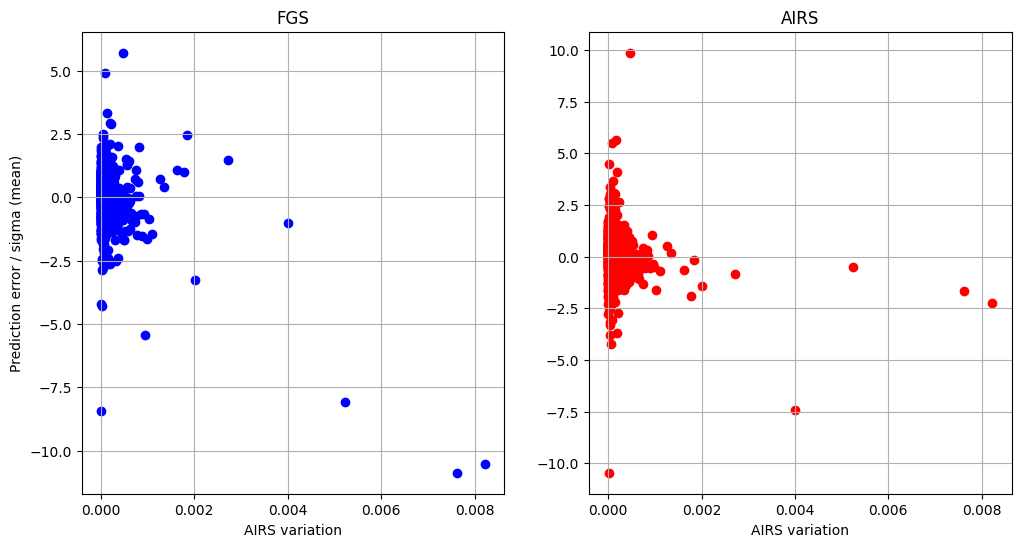

AIRS variation
1349926825, ratio:8.344, x:1.243e-04, y:1.037e-03, RMS:1.058e-03
2270815333, ratio:8.068, x:1.157e-04, y:9.337e-04, RMS:1.072e-03


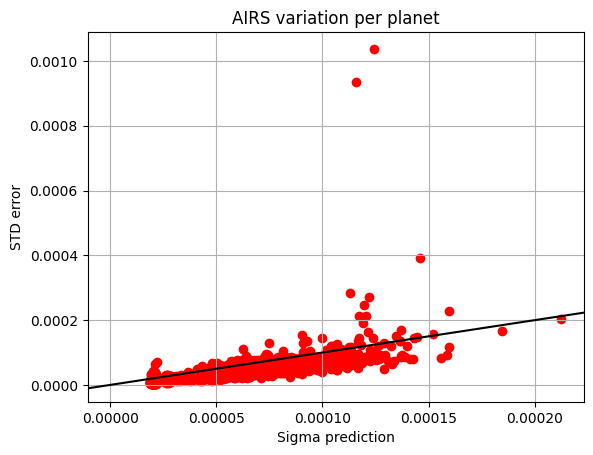

FGS
2270815333, ratio:461.121, x:1.750e-02, y:8.068e+00, RMS:1.072e-03
926530491, ratio:448.369, x:7.237e-03, y:3.245e+00, RMS:9.425e-05
AIRS
926530491, ratio:465.966, x:6.964e-03, y:3.245e+00, RMS:9.425e-05
2270815333, ratio:335.454, x:2.405e-02, y:8.068e+00, RMS:1.072e-03


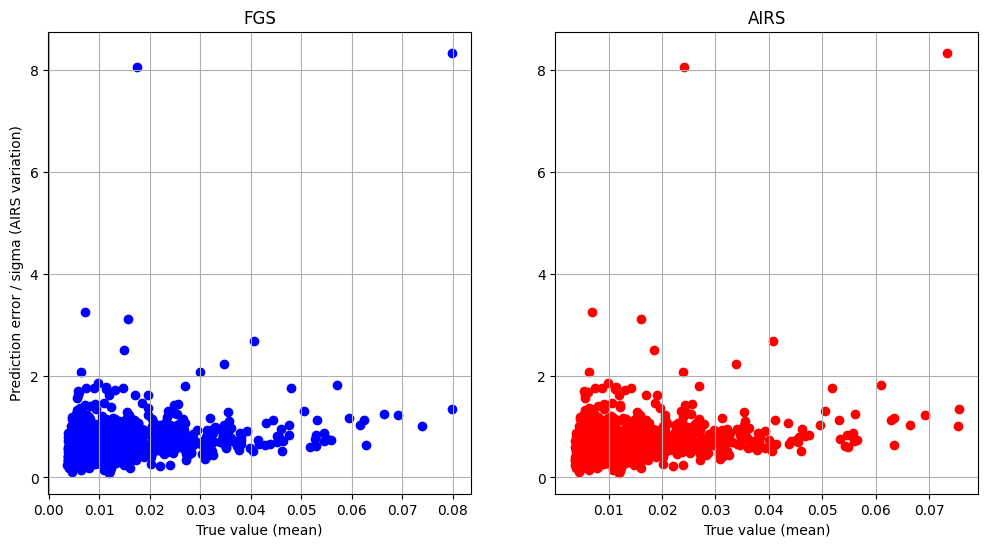

FGS
4084207590, ratio:12398112.308, x:2.447e-08, y:3.033e-01, RMS:2.110e-05
3669562759, ratio:5571667.276, x:4.804e-08, y:2.676e-01, RMS:2.230e-05
AIRS
4084207590, ratio:12398112.308, x:2.447e-08, y:3.033e-01, RMS:2.110e-05
3669562759, ratio:5571667.276, x:4.804e-08, y:2.676e-01, RMS:2.230e-05


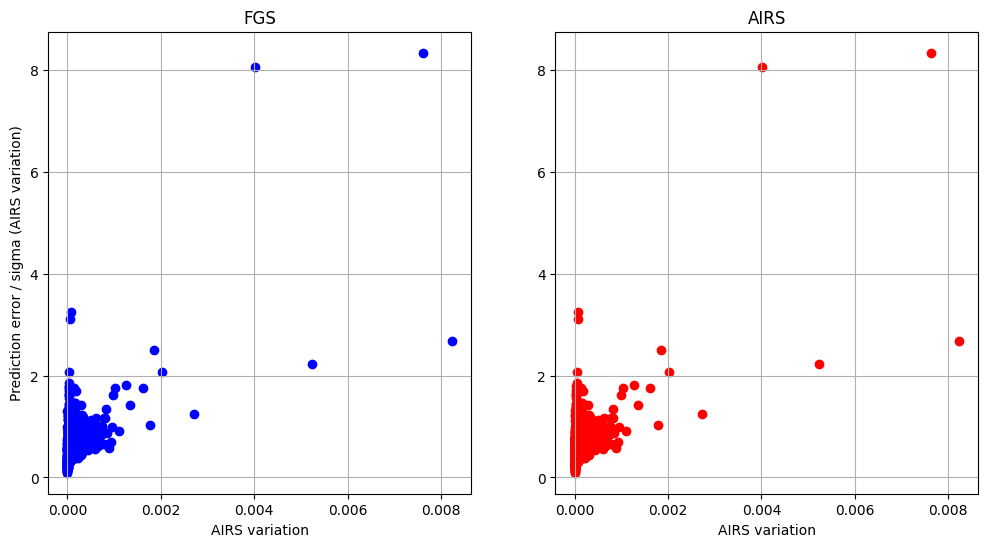

In [6]:
ignore_bad_planets = False
def filter_bad_data(data):
    data_out = []
    for d in data:
        if not d.planet_id in [1349926825, 3786449677, 2554492145, 1267010874, 94572221, 2270815333, 3649218579, 576917580, 2154305089, 2207815333, 2740910036]:
            data_out.append(d)
    return data_out
        
def basics():
    plt.grid(True)
    plt.box(True)
def plot_two_sensors(func, xl, yl, mod):
    _,ax = plt.subplots(1,2,figsize=(12,6))
    plt.sca(ax[0]);basics()
    plt.title('FGS')
    plt.xlabel(xl)
    plt.ylabel(yl)
    func(slice(0,1), 'blue', 'FGS')
    mod()
    
    plt.sca(ax[1]);basics()
    plt.title('AIRS')
    plt.xlabel(xl)
    func(slice(1,283), 'red', 'AIRS')
    mod()
    
    plt.pause(0.001)

def report_extreme_ratios(x,y,name):
    
    print(name)
    inds = np.argsort(np.abs(y/x))[::-1]
    for ii in inds[:2]:
        print(f'{inferred_data[ii].planet_id}, ratio:{np.abs(y[ii]/x[ii]):.3f}, x:{x[ii]:.3e}, y:{y[ii]:.3e}, RMS:{kgs.rms(error_matrix[ii,:]):.3e}')
    
    
for k,v in todo.items():
    (inferred_data,model,_) = kgs.dill_load(fname(k))
    if ignore_bad_planets:
        inferred_data = filter_bad_data(inferred_data)
        train_data_here = filter_bad_data(train_data)
    else:
        train_data_here = train_data
    #model.bias_a[0]+=0.006
    #model.bias_a[1]-=0.0002
    #inferred_data = model.infer(train_data)
    
    
    print(k)
    print(model.bias_a)
    print(model.bias_b)
    print(model.sigma_offset)
    print(model.sigma_fudge_FGS, model.sigma_fudge_AIRS_mean, model.sigma_fudge_AIRS_var)
    #try:
    #    print(model.sigma_offset)
    #except: pass
    #print(model.sigma_fudge)    
    #kgs.list_attrs(model)
    kgs.score_metric(inferred_data, train_data_here)
    print('')
    print('20')
    kgs.score_metric(inferred_data[:20], train_data_here[:20]) 
    print('')
    #print('No fudge')
    #model.sigma_fudge = [1,1]
    #try: model.sigma_offset = [0,0]
    #except: pass
    #model.bias_a = [1,1]
    #model.bias_b = [0,0]
    # print('!!!')
    #inferred_data = model.infer(train_data)
    if ignore_bad_planets:
        inferred_data = filter_bad_data(inferred_data)
    kgs.score_metric(inferred_data, train_data_here)     
    error_matrix = np.array([d.spectrum - t.spectrum for d,t in zip(inferred_data,train_data_here)])
    true_matrix = np.array([t.spectrum for d,t in zip(inferred_data,train_data_here)])
    
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(true_matrix[:,slic],1)
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)
        
    plot_two_sensors(plot_prediction_vs_true, 'True value (mean)', 'Prediction error (mean)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = [np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data]
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)
    def mod():
        plt.axline((0,0), slope=3, color='black')
        plt.axline((0,0), slope=-3, color = 'black')        
    plot_two_sensors(plot_mean_error_vs_sigma, 'Sigma prediction (mean)', 'Prediction error (mean)', mod)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = np.mean(true_matrix[:,slic],1)
        y = np.mean(error_matrix[:,slic],1) / np.array([np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data])
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)    
    plot_two_sensors(plot_mean_error_vs_sigma, 'True value (mean)', 'Prediction error / sigma (mean)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = np.std(true_matrix[:,1:],1)
        y = np.mean(error_matrix[:,slic],1) / np.array([np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data])
        #y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)    
    plot_two_sensors(plot_mean_error_vs_sigma, 'AIRS variation', 'Prediction error / sigma (mean)', lambda:0)
    
    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel('Sigma prediction')
    plt.ylabel('STD error')
    n=282
    x=np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
    y=np.sqrt(np.var(error_matrix[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    report_extreme_ratios(x,y,'AIRS variation')    
    plt.pause(0.001)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = np.mean(true_matrix[:,slic],1)
        y = np.sqrt(np.var(error_matrix[:,1:],1)) / np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)    
    plot_two_sensors(plot_mean_error_vs_sigma, 'True value (mean)', 'Prediction error / sigma (AIRS variation)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = np.std(true_matrix[:,1:],1)
        y = np.sqrt(np.var(error_matrix[:,1:],1)) / np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)    
    plot_two_sensors(plot_mean_error_vs_sigma, 'AIRS variation', 'Prediction error / sigma (AIRS variation)', lambda:0)
    
    
    

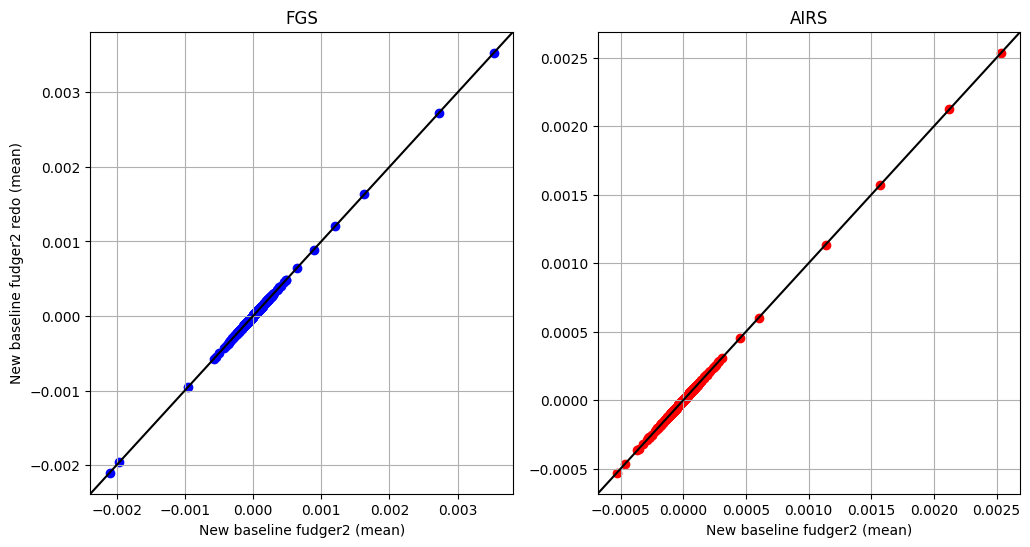

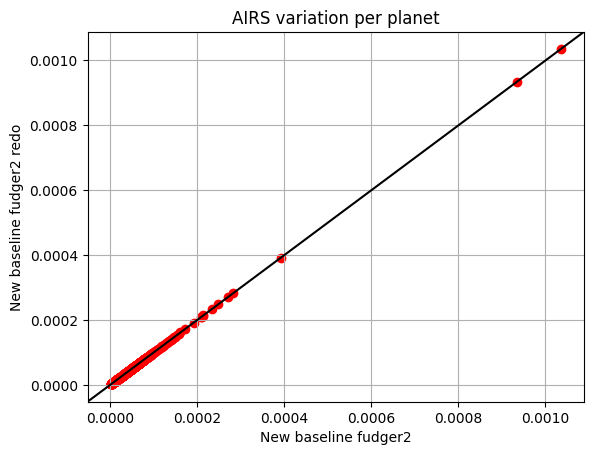

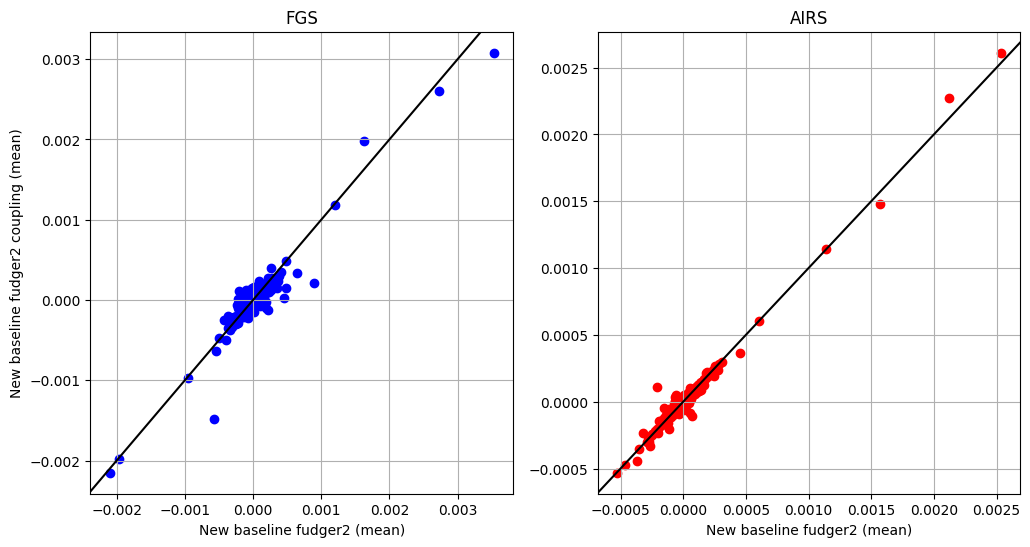

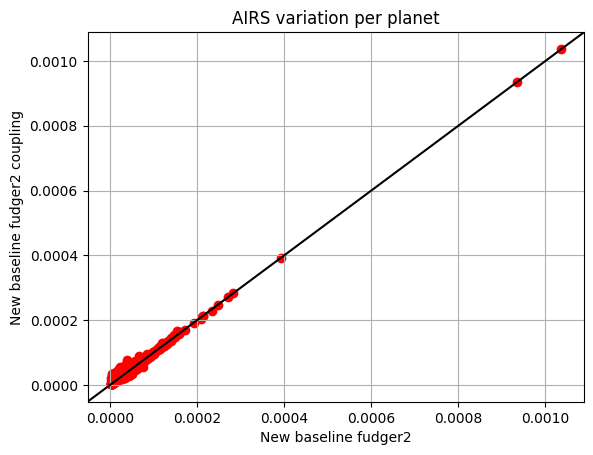

In [7]:
compare1= list(todo.keys())[0]
data1 = kgs.dill_load(fname(compare1))[0]
if ignore_bad_planets:
    data1 = filter_bad_data(data1)
for k,v in todo.items():    
    compare2= k
    if compare2==compare1:
        continue    
    data2 = kgs.dill_load(fname(compare2))[0]
    if ignore_bad_planets:
        data2 = filter_bad_data(data2)
        train_data_here = filter_bad_data(train_data)
    else:
        train_data_here = train_data           
    error1 = np.array([d.spectrum - t.spectrum for d,t in zip(data1,train_data_here)])
    error2 = np.array([d.spectrum - t.spectrum for d,t in zip(data2,train_data_here)])
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(error1[:,slic],1)
        y = np.mean(error2[:,slic],1)
        plt.scatter(x,y,color = col)

    plot_two_sensors(plot_prediction_vs_true, compare1+' (mean)', compare2+' (mean)', lambda:plt.axline((0,0),slope=1,color='black'))

    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel(compare1)
    plt.ylabel(compare2)
    x=np.sqrt(np.var(error1[:,1:],1))
    y=np.sqrt(np.var(error2[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    plt.pause(0.001)

In [8]:
# import subprocess

# # Hibernate Windows
# subprocess.run(
#     ["/mnt/c/Windows/System32/shutdown.exe", "/h"],  # add "/f" to force-close apps
#     check=True
# )